### Uczenie maszynowe
# 10. Sieci neuronowe – wprowadzenie

In [1]:
# Przydatne importy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## 10.1. Perceptron

https://www.youtube.com/watch?v=cNxadbrN_aI

### Pierwszy perceptron liniowy

* Frank Rosenblatt, 1957
* aparat fotograficzny podłączony do 400 fotokomórek (rozdzielczość obrazu: 20 x 20)
* wagi – potencjometry aktualizowane za pomocą silniczków

### Uczenie perceptronu

Cykl uczenia perceptronu Rosenblatta:

1. Sfotografuj planszę z kolejnym obiektem.
1. Zaobserwuj, która lampka zapaliła się na wyjściu.
1. Sprawdź, czy to jest właściwa lampka.
1. Wyślij sygnał „nagrody” lub „kary”.

### Funkcja aktywacji perceptronu

Funkcja bipolarna:

$$ g(z) = \left\{ 
\begin{array}{rl}
1  & \textrm{gdy $z > \theta_0$} \\
-1 & \textrm{wpp.}
\end{array}
\right. $$

gdzie $z = \theta_1x_1 + \ldots + \theta_nx_n$,<br/>
$\theta_0$ to próg aktywacji,<br/>
$x_0 = 1$. 

In [2]:
def bipolar_plot():
    matplotlib.rcParams.update({'font.size': 16})

    plt.figure(figsize=(8,5))
    x = [-1,-.23,1] 
    y = [-1, -1, 1]
    plt.ylim(-1.2,1.2)
    plt.xlim(-1.2,1.2)
    plt.plot([-2,2],[1,1], color='black', ls="dashed")
    plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
    plt.step(x, y, lw=3)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.annotate(r'$\theta_0$',
                 xy=(-.23,0), xycoords='data',
                 xytext=(-50, +50), textcoords='offset points', fontsize=26,
                 arrowprops=dict(arrowstyle="->"))

    plt.show()

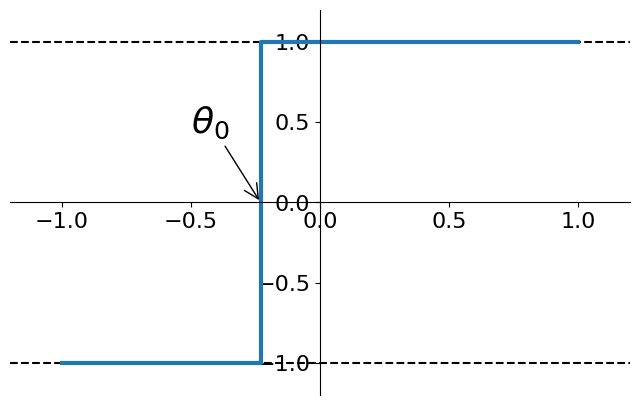

In [3]:
bipolar_plot()

### Schemat perceptronu

<img src="perceptron.png" alt="Rys. 11.1. Schemat perceptronu" style="height: 80%"/>

### Zasada działania perceptronu

1. Ustal wartości początkowe $\theta$ (wektor 0 lub liczby losowe blisko 0).
1. Dla każdego przykładu $(x^{(i)}, y^{(i)})$, dla $i=1,\ldots,m$
    * Oblicz wartość wyjścia $o^{(i)} = g(\theta^{T}x^{(i)}) = g(\sum_{j=0}^{n} \theta_jx_j^{(i)})$
    * Wykonaj aktualizację wag (tzw. *perceptron rule*):
    $$ \theta := \theta + \Delta \theta $$
    $$ \Delta \theta = \alpha(y^{(i)}-o^{(i)})x^{(i)} $$

$$\theta_j := \theta_j + \Delta \theta_j $$

Jeżeli przykład został sklasyfikowany **poprawnie**:

* $y^{(i)}=1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(1 - 1)x_j^{(i)} = 0$$
* $y^{(i)}=-1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(-1 - -1)x_j^{(i)} = 0$$

Czyli: jeżeli trafiłeś, to nic nie zmieniaj.

$$\theta_j := \theta_j + \Delta \theta_j $$

Jeżeli przykład został sklasyfikowany **niepoprawnie**:

* $y^{(i)}=1$ oraz $o^{(i)}=-1$ : $$\Delta\theta_j = \alpha(1 - -1)x_j^{(i)} = 2 \alpha x_j^{(i)}$$
* $y^{(i)}=-1$ oraz $o^{(i)}=1$ : $$\Delta\theta_j = \alpha(-1 - 1)x_j^{(i)} = -2 \alpha x_j^{(i)}$$

Czyli: przesuń wagi w odpowiednią stronę.

### Zalety perceptronu

* intuicyjny i prosty
* łatwy w implementacji
* jeżeli dane można liniowo oddzielić, algorytm jest zbieżny w skończonym czasie

### Wady perceptronu

* jeżeli danych nie można oddzielić liniowo, algorytm nie jest zbieżny

In [4]:
def plot_perceptron():
    plt.figure(figsize=(12,3))

    plt.subplot(131)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2,1.2)

    plt.title('AND')
    plt.plot([1,0,0], [0,1,0], 'ro', markersize=10)
    plt.plot([1], [1], 'go', markersize=10)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_position(('data',0))

    plt.xticks(np.arange(0, 2, 1.0))
    plt.yticks(np.arange(0, 2, 1.0))


    plt.subplot(132)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2,1.2)

    plt.plot([1,0,1], [0,1,1], 'go', markersize=10)
    plt.plot([0], [0], 'ro', markersize=10)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_position(('data',0))

    plt.title('OR')
    plt.xticks(np.arange(0, 2, 1.0))
    plt.yticks(np.arange(0, 2, 1.0))


    plt.subplot(133)
    plt.ylim(-0.2,1.2)
    plt.xlim(-0.2,1.2)

    plt.title('XOR')
    plt.plot([1,0], [0,1], 'go', markersize=10)
    plt.plot([0,1], [0,1], 'ro', markersize=10)

    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('none')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('none')
    ax.spines['left'].set_position(('data',0))

    plt.xticks(np.arange(0, 2, 1.0))
    plt.yticks(np.arange(0, 2, 1.0))

    plt.show()

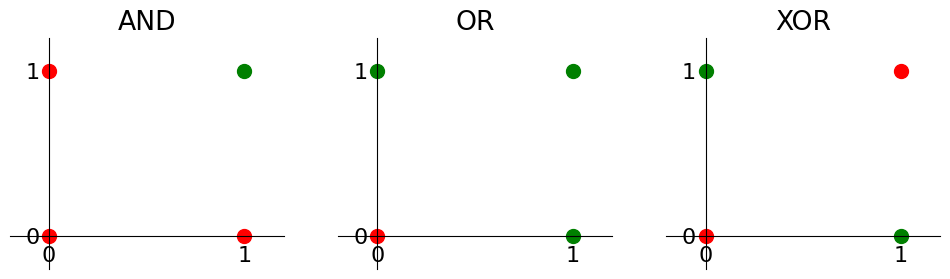

In [5]:
plot_perceptron()

### Perceptron – funkcje aktywacji

Zamiast funkcji bipolarnej możemy zastosować funkcję sigmoidalną jako funkcję aktywacji.

In [6]:
def plot_activation_functions():
    plt.figure(figsize=(16,7))
    plt.subplot(121)
    x = [-2,-.23,2] 
    y = [-1, -1, 1]
    plt.ylim(-1.2,1.2)
    plt.xlim(-2.2,2.2)
    plt.plot([-2,2],[1,1], color='black', ls="dashed")
    plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
    plt.step(x, y, lw=3)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.annotate(r'$\theta_0$',
                 xy=(-.23,0), xycoords='data',
                 xytext=(-50, +50), textcoords='offset points', fontsize=26,
                 arrowprops=dict(arrowstyle="->"))

    plt.subplot(122)
    x2 = np.linspace(-2,2,100)
    y2 = np.tanh(x2+ 0.23)
    plt.ylim(-1.2,1.2)
    plt.xlim(-2.2,2.2)
    plt.plot([-2,2],[1,1], color='black', ls="dashed")
    plt.plot([-2,2],[-1,-1], color='black', ls="dashed")
    plt.plot(x2, y2, lw=3)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))

    plt.annotate(r'$\theta_0$',
                 xy=(-.23,0), xycoords='data',
                 xytext=(-50, +50), textcoords='offset points', fontsize=26,
                 arrowprops=dict(arrowstyle="->"))

    plt.show()

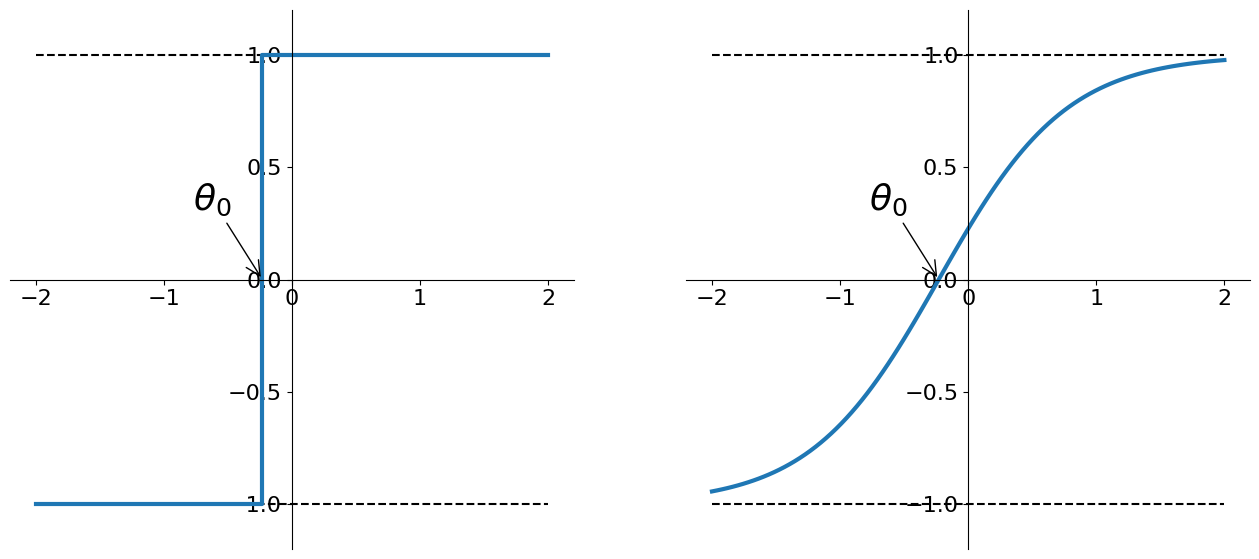

In [7]:
plot_activation_functions()

### Perceptron a regresja liniowa

<img src="reglin.png" alt="Rys. 11.2. Perceptron a regresja liniowa" style="height: 60%">

#### Uczenie regresji liniowej:
* Model: $$h_{\theta}(x) = \sum_{i=0}^n \theta_ix_i$$
* Funkcja kosztu (błąd średniokwadratowy): $$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2$$
* Po obliczeniu $\nabla J(\theta)$ - zwykły SGD.

### Perceptron a dwuklasowa regresja logistyczna

<img src="reglog.png" alt="Rys. 11.3. Perceptron a dwuklasowa regresja logistyczna" style="height:60%">

#### Uczenie dwuklasowej regresji logistycznej:
* Model: $h_{\theta}(x) = \sigma(\sum_{i=0}^n \theta_ix_i) = P(1|x,\theta)$
* Funkcja kosztu (entropia krzyżowa): $$\begin{eqnarray} J(\theta) &=& -\frac{1}{m} \sum_{i=1}^{m} \big( y^{(i)}\log P(1|x^{(i)},\theta) \\ && + (1-y^{(i)})\log(1-P(1|x^{(i)},\theta)) \big) \end{eqnarray}$$
* Po obliczeniu $\nabla J(\theta)$ - zwykły SGD.

### Perceptron a wieloklasowa regresja logistyczna

<img src="multireglog.png" alt="Rys. 11.4. Perceptron a wieloklasowa regresja logistyczna" style="height:60%">

#### Wieloklasowa regresja logistyczna
* Model (dla $c$ klasyfikatorów binarnych): 
$$\begin{eqnarray}
h_{(\theta^{(1)},\dots,\theta^{(c)})}(x) &=& \mathrm{softmax}(\sum_{i=0}^n \theta_{i}^{(1)}x_i, \ldots, \sum_{i=0}^n \theta_i^{(c)}x_i) \\ 
&=& \left[ P(k|x,\theta^{(1)},\dots,\theta^{(c)}) \right]_{k=1,\dots,c} 
\end{eqnarray}$$

* Funkcja kosztu (**przymując model regresji binarnej**): $$\begin{eqnarray} J(\theta^{(k)}) &=& -\frac{1}{m} \sum_{i=1}^{m} \big( y^{(i)}\log P(k|x^{(i)},\theta^{(k)}) \\ && + (1-y^{(i)})\log P(\neg k|x^{(i)},\theta^{(k)}) \big) \end{eqnarray}$$
* Po obliczeniu $\nabla J(\theta)$, **c-krotne** uruchomienie SGD, zastosowanie $\mathrm{softmax}(X)$ do niezależnie uzyskanych klasyfikatorów binarnych.

* Przyjmijmy: 
$$ \Theta = (\theta^{(1)},\dots,\theta^{(c)}) $$

$$h_{\Theta}(x) = \left[ P(k|x,\Theta) \right]_{k=1,\dots,c}$$

$$\delta(x,y) = \left\{\begin{array}{cl} 1 & \textrm{gdy } x=y \\ 0 & \textrm{wpp.}\end{array}\right.$$

* Wieloklasowa funkcja kosztu $J(\Theta)$ (kategorialna entropia krzyżowa):
$$ J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{c} \delta({y^{(i)},k}) \log P(k|x^{(i)},\Theta) $$

* Gradient $\nabla J(\Theta)$:
$$ \dfrac{\partial J(\Theta)}{\partial \Theta_{j,k}} = -\frac{1}{m}\sum_{i = 1}^{m} (\delta({y^{(i)},k}) - P(k|x^{(i)}, \Theta)) x^{(i)}_j 
$$

* Liczymy wszystkie wagi jednym uruchomieniem SGD

### Perceptron – podsumowanie

* W przypadku jednowarstowej sieci neuronowej wystarczy znać gradient funkcji kosztu.
* Wtedy liczymy tak samo jak w przypadku regresji liniowej, logistycznej, wieloklasowej logistycznej itp. (wymienione modele to szczególne przypadki jednowarstwowych sieci neuronowych).
* Regresja liniowa i binarna regresja logistyczna to jeden neuron.
* Wieloklasowa regresja logistyczna to tyle neuronów, ile klas.

Funkcja aktywacji i funkcja kosztu są **dobierane do problemu**.

## 10.2. Funkcje aktywacji

* Operacje, które każdy neuron wykonuje, to dodawanie i mnożenie. Są to **funkcje liniowe**.

* Złożenie funkcji liniowych jest funkcją liniową.

* Gdyby nie było funkcji aktywacji, cała sieć neuronowa działałaby jak regresja liniowa.

* **Najważniejszym celem** stosowania funkcji aktywacji jest **wprowadzenie nieliniowości**, dzięki której sieć może uczyć się zależności bardziej skomplikowanych niż tylko liniowe.

Jakie cechy powinna mieć dobra funkcja aktywacji?

* **różniczkowalna** (co najmniej **przedziałami różniczkowalna**), aby można było obliczyć jej gradient

* **prosta obliczeniowo**, ponieważ podczas uczenia sieci jej wartość obliczana jest wiele razy

* odporna na **problem zanikającego gradientu** (wyjaśnienie kilka slajdów dalej)

In [8]:
%matplotlib inline

import math
import matplotlib.pyplot as plt
import numpy as np
import random

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.optimizers import Adagrad, Adam, RMSprop, SGD

from IPython.display import YouTubeVideo

2023-05-04 10:23:21.183242: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 10:23:22.176521: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-04 10:23:22.176596: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-04 10:23:24.881062: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [9]:
def plot(fun):
    x = np.arange(-3.0, 3.0, 0.01)
    y = [fun(x_i) for x_i in x]
    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlim(-3.0, 3.0)
    ax.set_ylim(-1.5, 1.5)
    ax.grid()
    ax.plot(x, y)
    plt.show()

### Funkcja logistyczna

$$ g(x) = \frac{1}{1 + e^{-x}} $$

#### Funkcja logistyczna – wykres

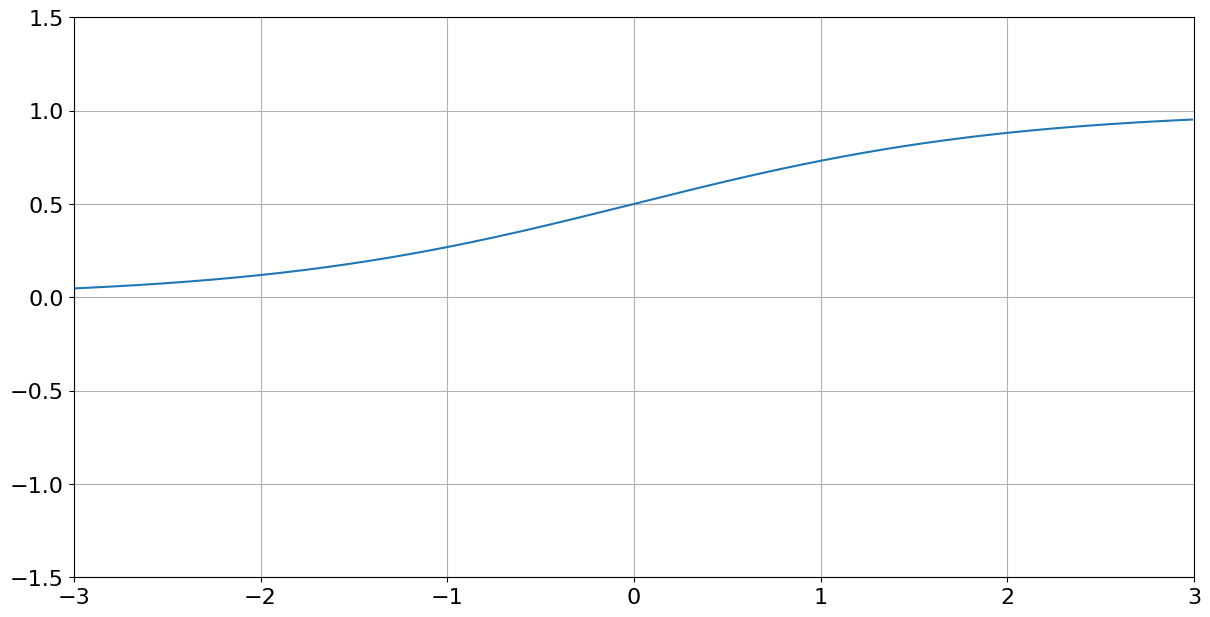

In [10]:
plot(lambda x: 1 / (1 + math.exp(-x)))

* Funkcja logistyczna przyjmuje wartości z przedziału $(0, 1)$.

### Tangens hiperboliczny

$$ g(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

#### Tangens hiperboliczny – wykres

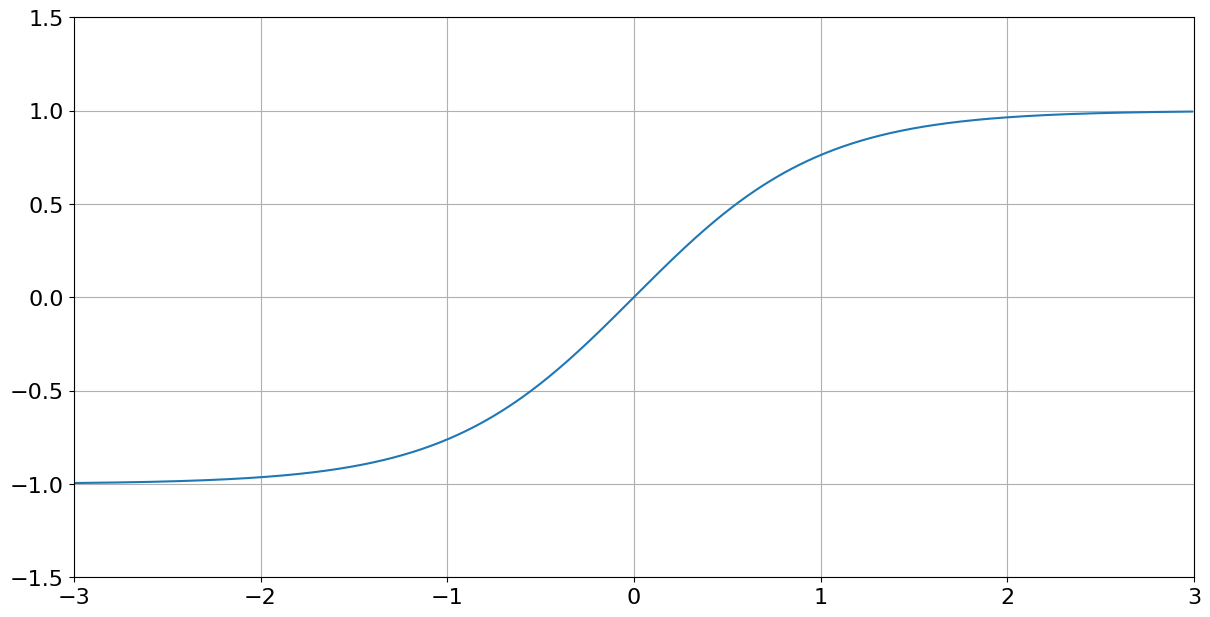

In [11]:
plot(lambda x: math.tanh(x))

* Tangens hiperboliczny przyjmuje wartości z przedziału $(-1, 1)$.

* Powstaje z funkcji logistytcznej przez przeskalowanie i przesunięcie.

* Daje szybszą zbieżność niż funkcja logistyczna dzięki temu, że przedział wartości jest symetryczny względem zera.

* Ze względu na ograniczony przedział wartości, obie funkcje (logistyczna i $\tanh$) są podatne na problem zanikającego gradientu.

### Problem zanikającego gradientu (*vanishing gradient problem*)

* Sigmoidalne funkcje aktywacji ograniczają wartości na wyjściach neuronów do niewielkich przedziałów ($(-1, 1)$, $(0, 1)$ itp.).
* Jeżeli sieć ma wiele warstw, to podczas propagacji wstecznej mnożymy przez siebie wiele małych wartości → obliczony gradient jest mały.
* Im więcej warstw, tym silniejszy efekt zanikania.

#### Sposoby na zanikający gradient

* Modyfikacja algorytmu optymalizacji (*RProp*, *RMSProp*)
* Użycie innej funckji aktywacji (ReLU, softplus)
* Dodanie warstw *dropout*
* Nowe architektury (LSTM itp.)
* Więcej danych, zwiększenie mocy obliczeniowej

### ReLU (*Rectifier Linear Unit*)

$$ g(x) = \max(0, x) $$

#### ReLU – wykres

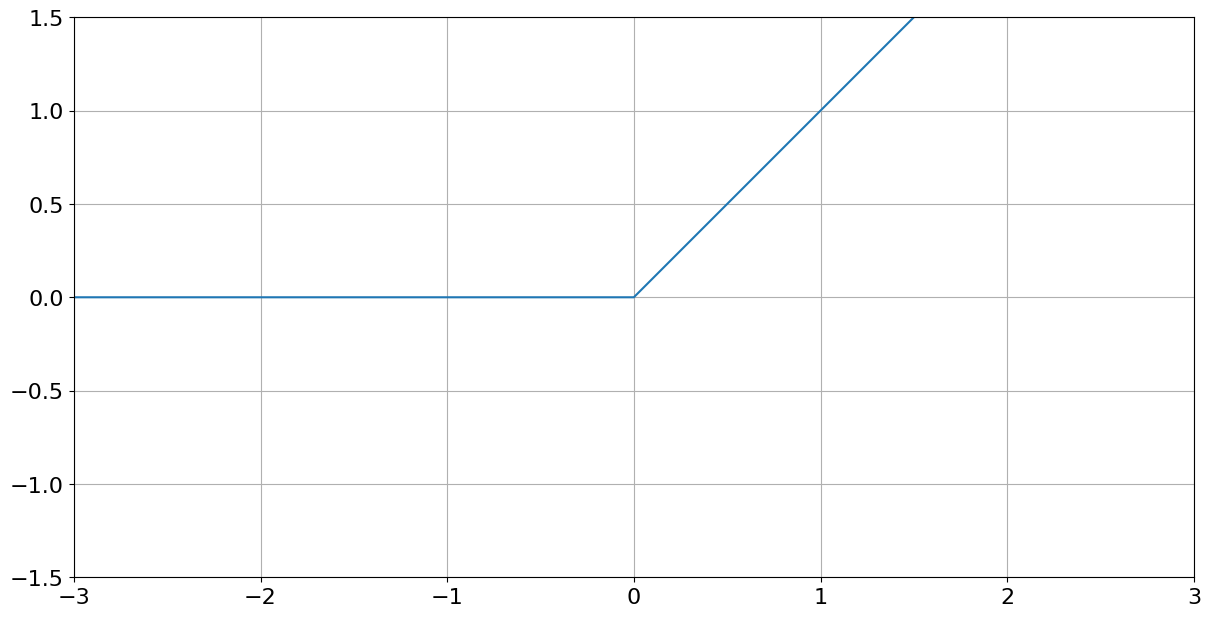

In [12]:
plot(lambda x: max(0, x))

#### ReLU – zalety
* Mniej podatna na problem zanikającego gradientu (*vanishing gradient*) niż funkcje sigmoidalne, dzięki czemu SGD jest szybciej zbieżna.
* Prostsze obliczanie gradientu.
* Dzięki zerowaniu ujemnych wartości, wygasza neurony, „rozrzedzając” sieć (*sparsity*), co przyspiesza obliczenia.

#### ReLU – wady
* Dla dużych wartości gradient może „eksplodować”.
* Za dużo „wygaszonych” neuronów może mieć negatywny wpływ na przepływ gradientu do poprzedzających warstw.

### Inne funkcje aktywacji

W literaturze zaproponowano też inne funkcje aktywacji, które są lepsze od ReLU pod niektórymi względami:
* softplus
* ELU
* leaky ReLU
* SiLU / swish

W praktyce jednak ReLU pozostaje najpopularniejszą funkcją aktywacji ze względu na jej prostotę, skuteczność i szybkość obliczania.

## 10.3. Wielowarstwowe sieci neuronowe

czyli _Artificial Neural Networks_ (ANN) lub _Multi-Layer Perceptrons_ (MLP)

![Rys. 9.5. Wielowarstwowa sieć neuronowa](nn1.png "Rys. 9.5. Wielowarstwowa sieć neuronowa")

#### Architektura sieci

* Sieć neuronowa jako graf neuronów. 
* Organizacja sieci przez warstwy.
* Najczęściej stosowane są sieci jednokierunkowe i gęste.
* $n$-warstwowa sieć neuronowa ma $n+1$ warstw (nie liczymy wejścia).
* Rozmiary sieci określane poprzez liczbę neuronów lub parametrów.

### Sieć neuronowa jednokierunkowa (*feedforward*)

* Mając daną $n$-warstwową sieć neuronową oraz jej parametry $\Theta^{(1)}, \ldots, \Theta^{(L)} $ oraz $\beta^{(1)}, \ldots, \beta^{(L)} $, liczymy:<br/><br/> 
$$a^{(l)} = g^{(l)}\left( a^{(l-1)} \Theta^{(l)} + \beta^{(l)} \right). $$

![Rys. 11.6. Wielowarstwowa sieć neuronowa - feedforward](nn2.png "Rys. 11.6. Wielowarstwowa sieć neuronowa - feedforward")

* Funkcje $g^{(l)}$ to tzw. **funkcje aktywacji**.<br/>
Dla $i = 0$ przyjmujemy $a^{(0)} = \mathrm{x}$ (wektor wierszowy cech) oraz $g^{(0)}(x) = x$ (identyczność).

* Parametry $\Theta$ to wagi na połączeniach miedzy neuronami dwóch warstw.<br/>
Rozmiar macierzy $\Theta^{(l)}$, czyli macierzy wag na połączeniach warstw $a^{(l-1)}$ i $a^{(l)}$, to $\dim(a^{(l-1)}) \times \dim(a^{(l)})$.

* Parametry $\beta$ zastępują tutaj dodawanie kolumny z jedynkami do macierzy cech.<br/>Macierz $\beta^{(l)}$ ma rozmiar równy liczbie neuronów w odpowiedniej warstwie, czyli $1 \times \dim(a^{(l)})$.

* **Klasyfikacja**: dla ostatniej warstwy $L$ (o rozmiarze równym liczbie klas) przyjmuje się $g^{(L)}(x) = \mathop{\mathrm{softmax}}(x)$.
* **Regresja**: pojedynczy neuron wyjściowy jak na obrazku. Funkcją aktywacji może wtedy być np. funkcja identycznościowa.

* Pozostałe funkcje aktywacji najcześciej mają postać sigmoidy, np. sigmoidalna, tangens hiperboliczny.
* Mogą mieć też inny kształt, np. ReLU, leaky ReLU, maxout.

### Uczenie wielowarstwowych sieci neuronowych

Mając algorytm SGD oraz gradienty wszystkich wag, moglibyśmy trenować każdą sieć.

* Niech:
$$\Theta = (\Theta^{(1)},\Theta^{(2)},\Theta^{(3)},\beta^{(1)},\beta^{(2)},\beta^{(3)})$$

* Funkcja sieci neuronowej z grafiki:

$$\small h_\Theta(x) = \tanh(\tanh(\tanh(x\Theta^{(1)}+\beta^{(1)})\Theta^{(2)} + \beta^{(2)})\Theta^{(3)} + \beta^{(3)})$$
* Funkcja kosztu dla regresji:
$$J(\Theta) = \dfrac{1}{2m} \sum_{i=1}^{m} (h_\Theta(x^{(i)})- y^{(i)})^2 $$

Jak obliczymy gradienty?

$$\nabla_{\Theta^{(l)}} J(\Theta) = ? \quad \nabla_{\beta^{(l)}} J(\Theta) = ?$$

* Postać funkcji kosztu zależna od wybranej architektury sieci oraz funkcji aktywacji.

$$\small J(\Theta) = \frac{1}{2}(a^{(L)} - y)^2 $$
$$\small  \dfrac{\partial}{\partial a^{(L)}} J(\Theta) = a^{(L)} - y$$

$$\small \tanh^{\prime}(x) = 1 - \tanh^2(x)$$